<h4>Problem Statement - Evaluate the new loan applicants on the basis of historical data with 8 parameters and build a model which predicts the probabibility of default on loans.</h4><br>

<li>Dataset - Bank loan default</li>
<li>Variables - 9 (8 independent and 1 dependent)</li>
<li>Dependent Variable - default (Categorical)</li>
<li>Observations - 850</li>


<h4>Setting the working directory and importing the dataset</h4

In [1]:
import os

os.getcwd() # Fetching current working directory
path = '/Users/chinmaygovilkar/OneDrive/EdWisor Assignments/Project - 2' # Storing the directory path
os.chdir(path) # Setting the new working directory
os.getcwd() # Checking if the new directory is successfully set

'/Users/chinmaygovilkar/OneDrive/EdWisor Assignments/Project - 2'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline

train_loan = pd.read_csv('bank-loan.csv') # Importing the dataset

In [3]:
train_loan.head() # Checking the first 5 observations of the dataset

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


We'll see each and every variable in detail from our dataset<br><br>

<li><b>age</b> - represents the age of the applicant in years. Continuous variable, numeric datatype.</li>
<li><b>ed</b> - represents the education level of the applicant. Categorical (ordinal) variable, object datatype</li>
<li><b>employ</b> - represents the no. of years of employment. Continuous variable, numeric datatype</li>
<li><b>address</b> - represents the address of the applicant. Continuous variable, numeric datatype</li>
<li><b>Income</b> - represents the income of the applicant. Continuous variable, numeric datatype</li>
<li><b>debtinc</b> - represents the debt to income of the applicant. Continuous variable, numeric datatype</li>
<li><b>creddebt</b> - represents the debt to credit ratio of the applicant. Continuous variable, numeric datatype</li>
<li><b>othdebt</b> - represents any other debts of the applicant. Continuous variable, numeric datatype</li>
<li><b>default</b> - the response variable. Categorical (nominal) variable, object datatype</li>

<b>Objective vs domain knowledge</b> - We're trying to predict whether or not a loan applicant will default on the borrowed loan. In short, we're determining credit risk & thus building a model which would mitigate those risks. To determine the credit risk, we must familiarise ourselves with a bit of domain knoweldge.

<li><b>Debt to income ratio</b> - The sum of your income, which pays your debts (EMI's, Loans, CC payments etc)</li>
<li><b>Debt to credit ratio</b> - Amount of revolving credit against total available credit (Credit limit)</li>

Both of these ratios will help the lenders determine a person's creditworthiness. The debt to credit ratio will impact your credit score which is measured between 300 to 850 depending on your previous debt history, however a debt to income ratio will not impact your credit score and only measure the amount of debt you own against your credit.<br><br>

<li>Lenders such as Banks prefer to see a <b>low debt to credit ratio</b> when a credit is applied.</li>
<li>As a rule of thumb, <b>lenders will consider a debt to credit ratio of 30% or lower as a good benchmark for loan approvals.</b></li>
<li>Lenders may still choose to see your debt to income ratio, even though it does not impact your credit scores. The DTI ratio measures the amount of debts you owe against your income before taxes. <b>This generally indicates a spending pattern for lenders</b> and helps determine the creditworthiness of the applicant</li><br>

In addition, these factors also determine the credit risks:
<li>Capacity to repay - If borrowed, will the borrower be able to clear the debts</li>
<li>Character of the borrower - The background of the borrower, previous outstanding debts, income range etc</li>
<li>Capital of the borrower - Current financial status of the borrower</li>
<li>Condition of the borrower - The spending habit against the income drawn</li>
<li>Collateral - A security against the sum borrowed</li>

In [4]:
train_loan.describe() # Checking the descriptive statistics of the dataset

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [5]:
train_loan.dtypes # Checking the datatypes of the dataset

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

Currently, the datatypes are all numeric. However few variables need to be converted.

In [6]:
train_loan['ed'] = train_loan['ed'].astype(object) # Converting the ed variable to an object datatype
train_loan['default'] = train_loan['default'].astype(object) # Converting the default variable to an object datatype

In [7]:
train_loan.dtypes # Rechecking the datatypes of the dataset

age           int64
ed           object
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default      object
dtype: object

<h3>Data Pre-processing and assumptions</h3>

Before, we actually begin to clean the data, let us list some assumptions with respect to the dataset.<br><br>

<li>The education variable consists of 5 levels from <b> high school | college | graduation | post graduation | PhD.</b></li>
<li>The employment and age variables show a linear correlation.</li>
<li>The income variable as value times thousand and currency as USD.</li>
<li>The income and ed variables show a correlation.</li>
<li>The income variable is the gross annual income as opposed to a monthly income.</li>
<li>The DTI or debt to income ratio is a value in percentage.</li>
<li>The CDR or credit to debt ratio is also a value in percentage.</li>
<li>The other debt value is also a value in percentage.</li>

<h4>Initial obserations</h4><br>

<li>Varibles ages and default are inversly proportional, higher the age less likely are chances of default</li>
<li>Variables education and default are inversly proportional, higher the education less likely are chances of default</li>
<li>Variables employment and income are directly proportional, higher the employment tenure higher and more stable is the income</li>
<li>Variables debtinc and default are directly proportional, higher the debt to income ratio more likely are chances of default</li>
<li>Variables creddebt and default are directly proportional, higher the debt to credit ratio more likely are chances of default</li>

<h4>Debt-to-income ratio</h4>

The DTI is one of the critical parameters along with credit score and credit history. We have been provided with the potential borrower's gross annual income and the DTI ratio. Thus we'll be able to calculate the actual debt the borrower owes. DTI is calculated as:

<b>DTI = Total of annual debt payments/gross annual income.</b>

We have the DTI ratio as well as the gross annual income, so we'll calculate the debt by multiplying DTI and annual income.

In [8]:
train_loan['debt'] = ((train_loan['income']*1000)*(train_loan['debtinc']/100)) # Calculate the actual debt and add a new column

In [9]:
train_loan.head() # Recheck the head of the new dataframe

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,debt
0,41,3,17,12,176,9.3,11.359392,5.008608,1,16368.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0,5363.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0,3025.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0,3480.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1,4844.0


<h4>Debit-to-credit ratio</h4>

The debt to credit or also known as a credit limit is an important parameter in determining the creditworthiness of a loan applicant. However we have not been provided with the number of products the applicant is holding with the bank, thus we'll assume the credit limit to be overall for all products.

But as the overall credit limit is not provided and we only know the ratio, it is not possible to predict the individual spending on each of the products.

<h3>Data Cleaning</h3>

Here, we'll clean the dataset for missing values, treat outliers and also check the correlation between variables.

In [10]:
train_loan.isnull().sum() # Checking if missing values present in our dataset.

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
debt          0
dtype: int64

It appears that our dataset has no missing values at least in the independent variables, there are 150 missing values in our dependent variable, but which I presume are to be separated out and appended as test data.

Thus, we'll now be analysing all predictor variables for outlier capping

In [11]:
train_loan['age'].sort_values(ascending = True) # Min & Max ages are 20 and 56, suggests working class

681    20
426    20
176    21
24     21
461    21
       ..
569    54
231    55
189    55
445    56
779    56
Name: age, Length: 850, dtype: int64

In [12]:
train_loan['employ'].sort_values(ascending = True) 
# Min & Max employment years are 0 and 33 years, suggests a mixture of freshers and experienced individuals

424     0
426     0
413     0
407     0
403     0
       ..
691    31
528    31
632    31
723    33
750    33
Name: employ, Length: 850, dtype: int64

In [13]:
train_loan['address'].sort_values(ascending = True)
# The loan applicants are spread out in 35 different localities.

312     0
738     0
111     0
96      0
519     0
       ..
393    29
842    30
489    31
641    31
569    34
Name: address, Length: 850, dtype: int64

In [14]:
train_loan['debtinc'].sort_values(ascending = True)

786     0.1
427     0.4
76      0.6
232     0.6
350     0.7
       ... 
492    33.3
584    33.4
122    35.3
583    36.6
373    41.3
Name: debtinc, Length: 850, dtype: float64

This shows that the minimum debt to income ratio is 0.1% and maximum is 41.3%. The higher the debt to income ratio, lower the chances of the loan being approved as the chances of defualt are high. Ideally an accepted rate is considered around 30%, thus we do not see any extreme values which could be skewing our data.

In [15]:
train_loan['creddebt'].sort_values(ascending = True)

571     0.011696
567     0.014835
786     0.022050
690     0.024528
425     0.024576
         ...    
325    14.596200
373    15.016680
466    15.791776
444    16.031470
300    20.561310
Name: creddebt, Length: 850, dtype: float64

This shows that the minimum debt to credit ratio is almost 0 at 0.011% and the maximum debt to credit ratio is at 20%. This indicates that all of the loan applicants are spending less than 21% of their total available credit, which is actually impressive for having a good credit score. 

In [16]:
train_loan['othdebt'].sort_values(ascending = True)

436     0.045584
786     0.052950
10      0.089488
76      0.100926
271     0.107520
         ...    
478    18.269130
491    20.615868
466    23.104224
343    27.033600
707    35.197500
Name: othdebt, Length: 850, dtype: float64

The other debt indicates, EMI's or mortgages apart from the credit card expenses of the applicant. The range is from 0.04% to 35.19%. The higher this debt is, lower the chances of getting the loan approved.

In [17]:
train_loan['debt'].sort_values(ascending = True)

786       75.0
76       126.0
436      176.0
271      192.0
330      198.0
        ...   
325    31800.0
300    32637.0
343    35200.0
466    38896.0
707    48750.0
Name: debt, Length: 850, dtype: float64

This debt variable is a derived variable, which indicates the total debt amount due annually against gross income.

<h3>Exploratory Data Analysis</h3>

Before we actually explore our data further, let us quickly check the distribution of our data and if any skewness is seen.

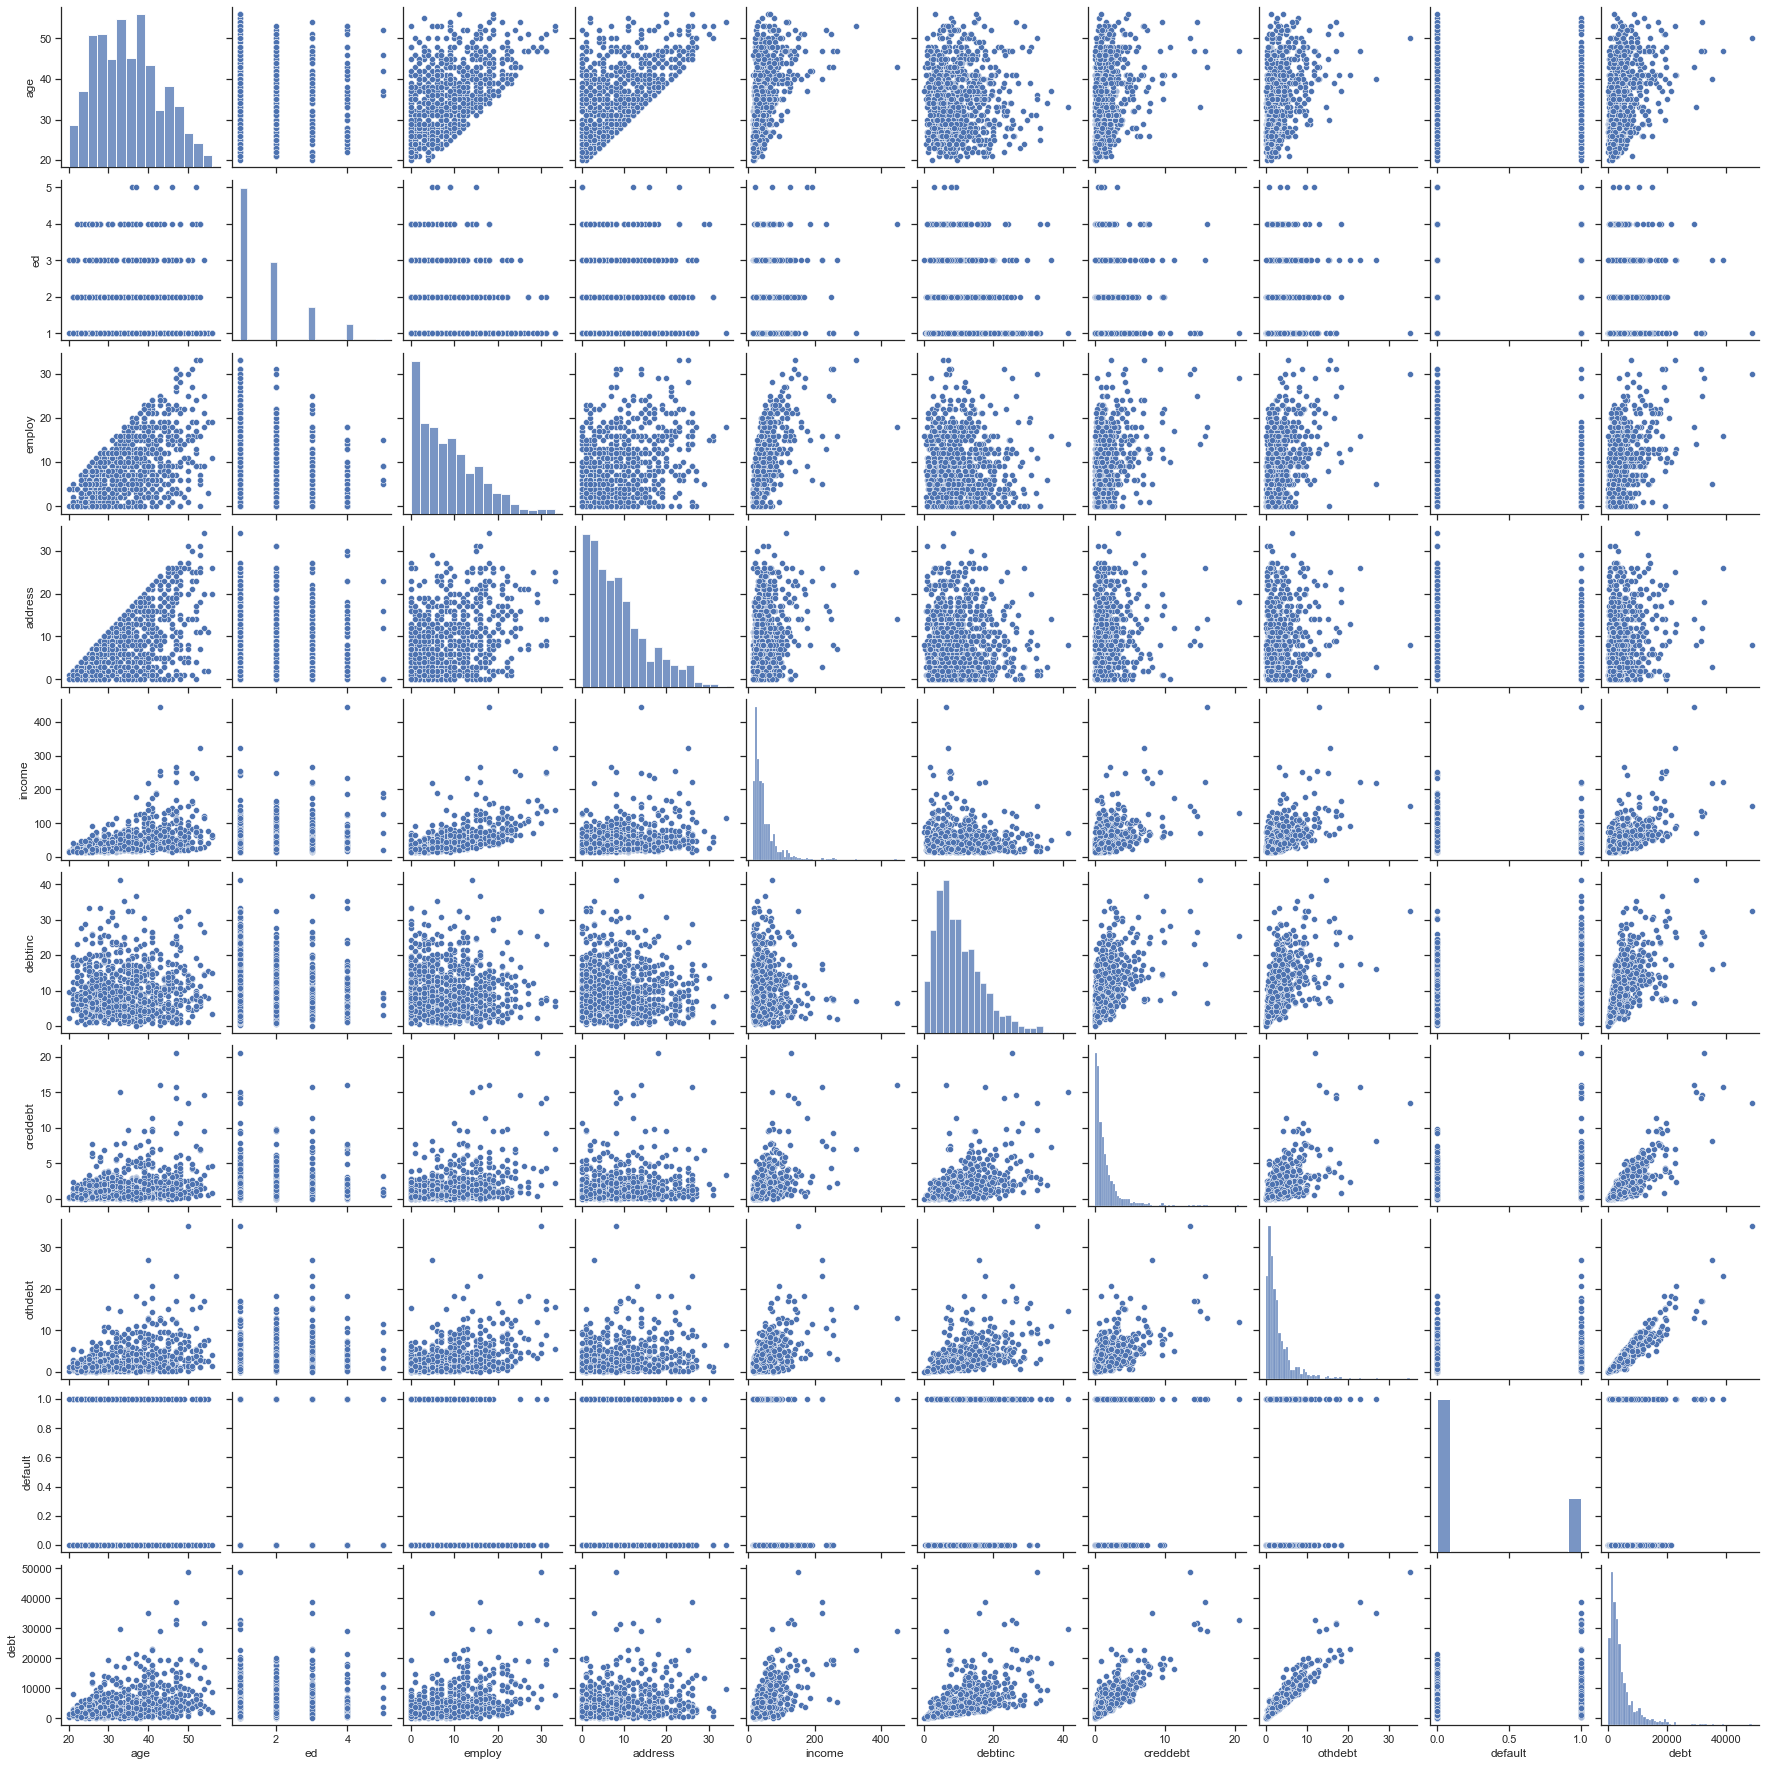

In [18]:
sns.set_theme(style="ticks")
sns.pairplot(train_loan)

In [19]:
import statsmodels.api as sm 
import pylab as py 

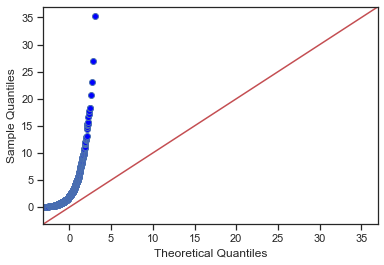

In [20]:
sm.qqplot(train_loan['othdebt'], line ='45') 
py.show()

<AxesSubplot:xlabel='age'>

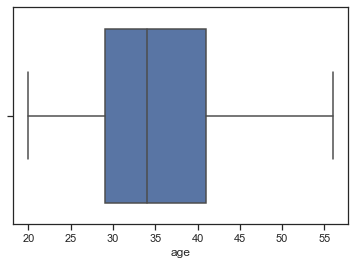

In [21]:
sns.boxplot(x=train_loan['age'])

<AxesSubplot:xlabel='employ'>

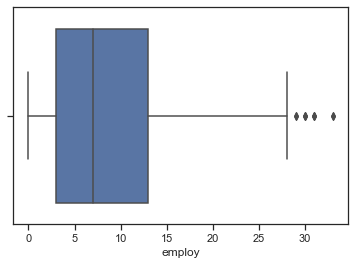

In [22]:
sns.boxplot(x=train_loan['employ'])

<AxesSubplot:xlabel='debtinc'>

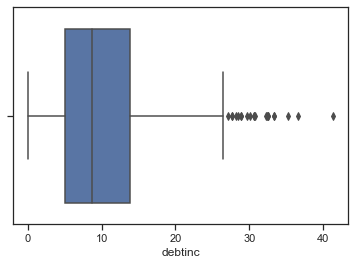

In [23]:
sns.boxplot(x=train_loan['debtinc'])

<AxesSubplot:xlabel='creddebt'>

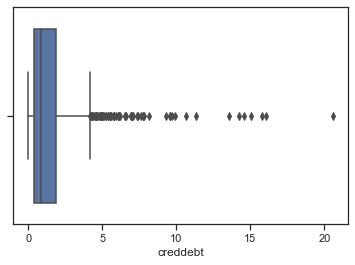

In [24]:
sns.boxplot(x=train_loan['creddebt'])

<AxesSubplot:xlabel='othdebt'>

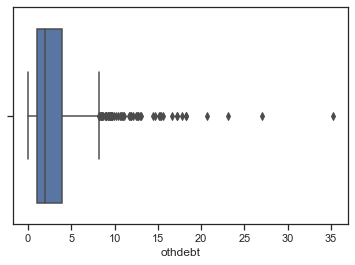

In [25]:
sns.boxplot(x=train_loan['othdebt'])

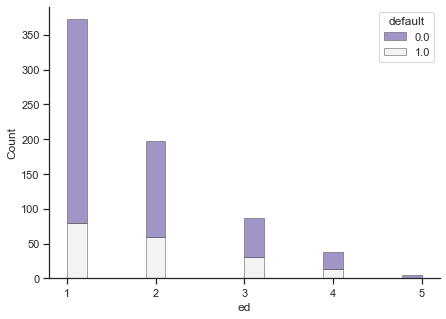

In [26]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    train_loan,
    x="ed", hue="default",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)
ax.set_xticks([1, 2, 3, 4, 5])

<AxesSubplot:xlabel='ed', ylabel='count'>

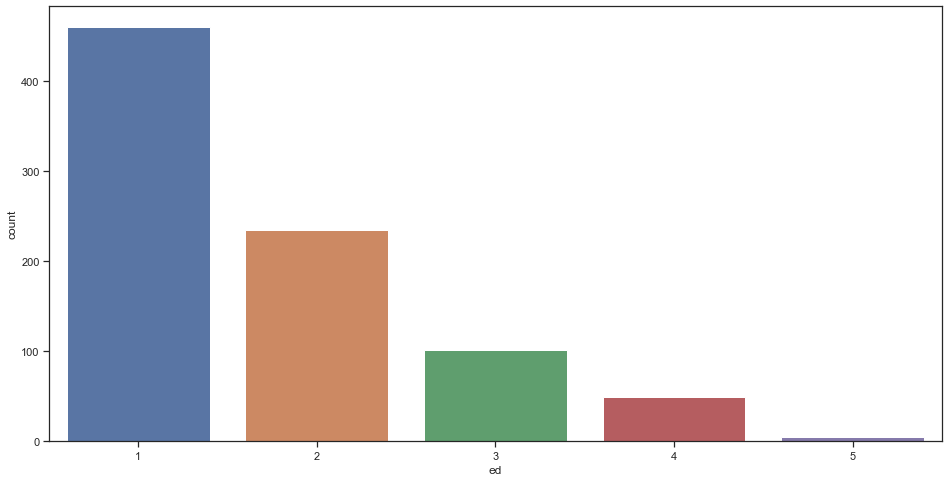

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(x="ed", data=train_loan)

The above plot shows the distribution of loan applicants grouped by the level of education.

As previously listed in our assumptions, we've considered the levels 1 to 5 in increasing order from high school to Ph.D.<br><br>

<li>More than 400 applicants have the lowest academic qualification, however is not the most critical identifier in determining the loan approval.</li><br>
<li>More than 200 applicants are at least graduates, basic qualification for a professional job</li><br>
<li>Approximately 100 applicants are post graduates, highly qualified, less likely to default on loan</li><br>
<li>Remaining applicants are research students, most likely academicians or research scientists, indicating high and stable income, less likely to default</li> 

<AxesSubplot:xlabel='address', ylabel='count'>

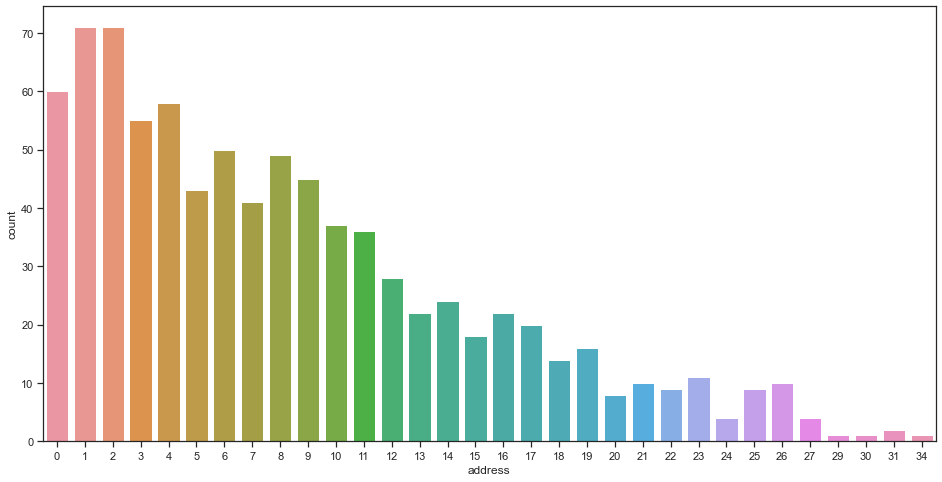

In [28]:
plt.figure(figsize=(16,8))
sns.countplot(x="address", data=train_loan)

The above plot shows the count of loan applicants with respect to their staying localities. Considering the 35 areas as boroughs or neighborhoods across a city. Each neighborhood is likely to depict a different standard of living and quality of life.<br><br>

<li>The maximum count of applicants is from areas 0 to 12, each having at least 30 applicants.</li><br>
<li>All the other applicants are from remaining areas with on an average 10 applicants.</li><br>

This may indicate a difference in lifestyles in these areas or also could indicate the inhabitant distribution.

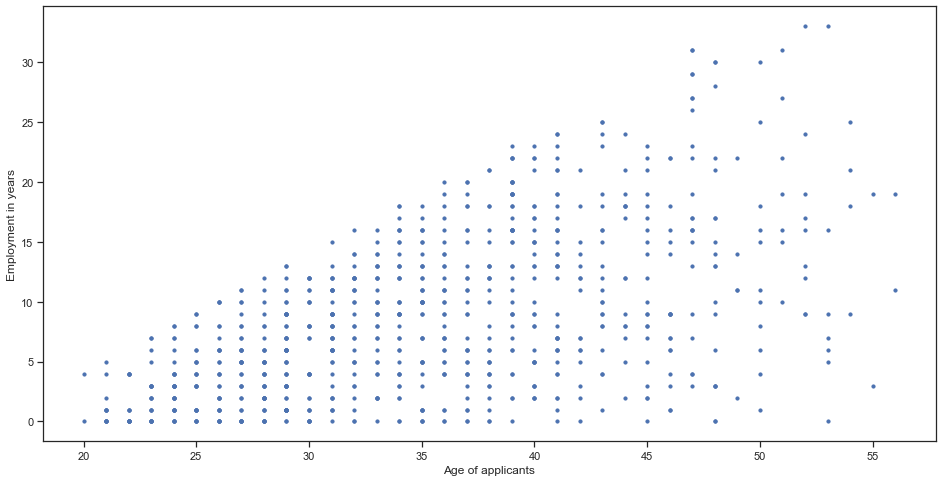

In [29]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_loan['age'], y=train_loan['employ'], s=10)
plt.xlabel('Age of applicants')
plt.ylabel('Employment in years')
plt.show()

As assumed, the relationship between age of the applicants and the employment experience is linear.

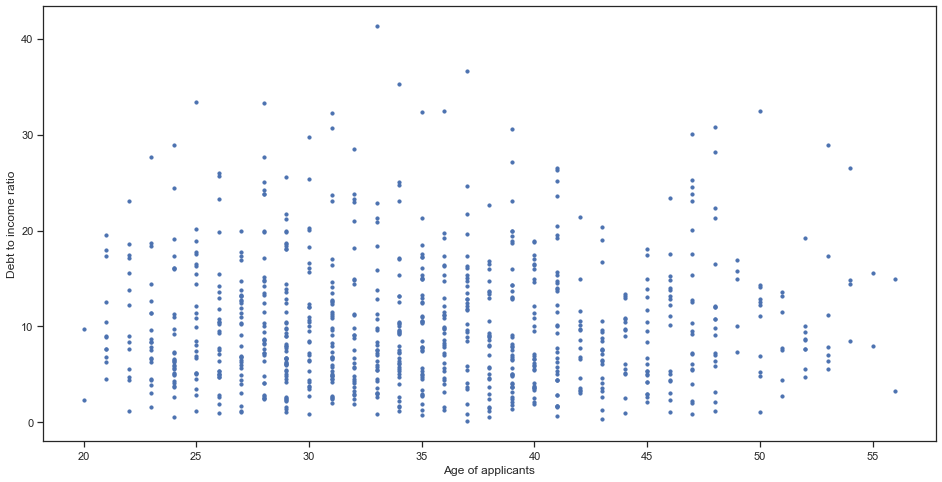

In [30]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_loan['age'], y=train_loan['debtinc'], s=10)
plt.xlabel('Age of applicants')
plt.ylabel('Debt to income ratio')
plt.show()

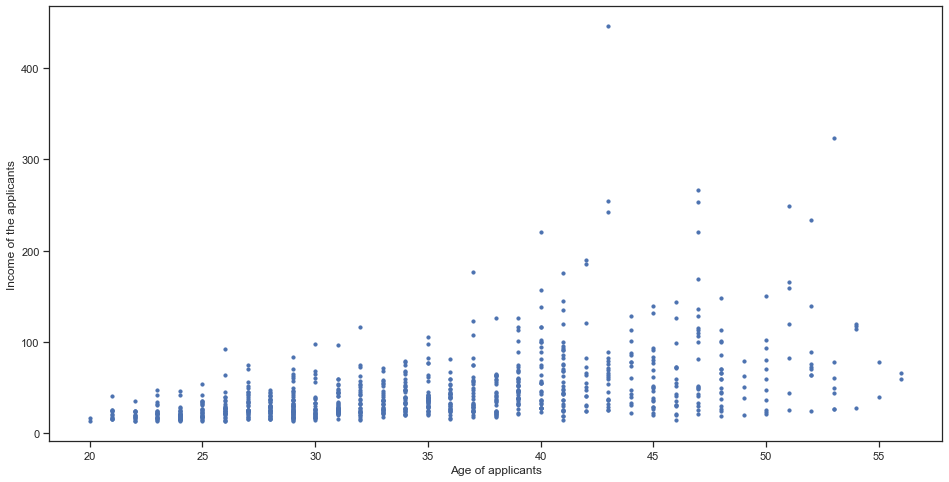

In [31]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_loan['age'], y=train_loan['income'], s=10)
plt.xlabel('Age of applicants')
plt.ylabel('Income of the applicants')
plt.show()

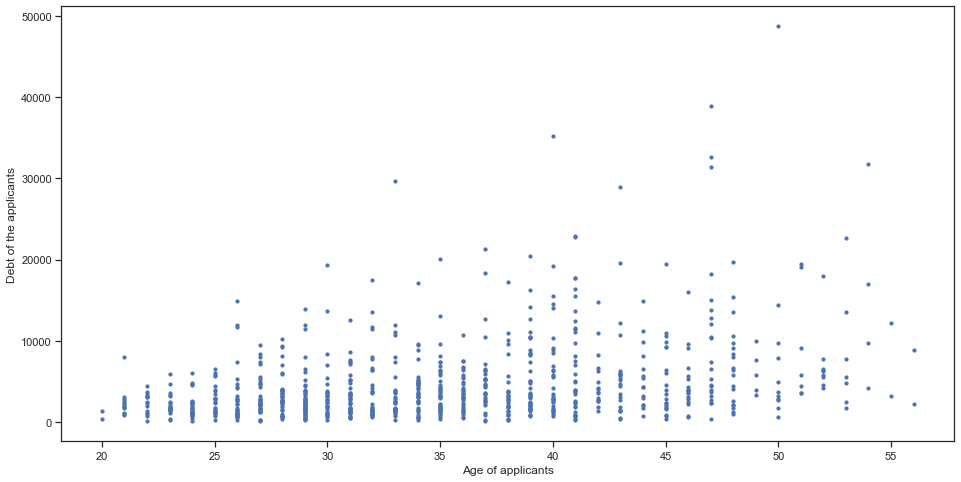

In [32]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_loan['age'], y=train_loan['debt'], s=10)
plt.xlabel('Age of applicants')
plt.ylabel('Debt of the applicants')
plt.show()

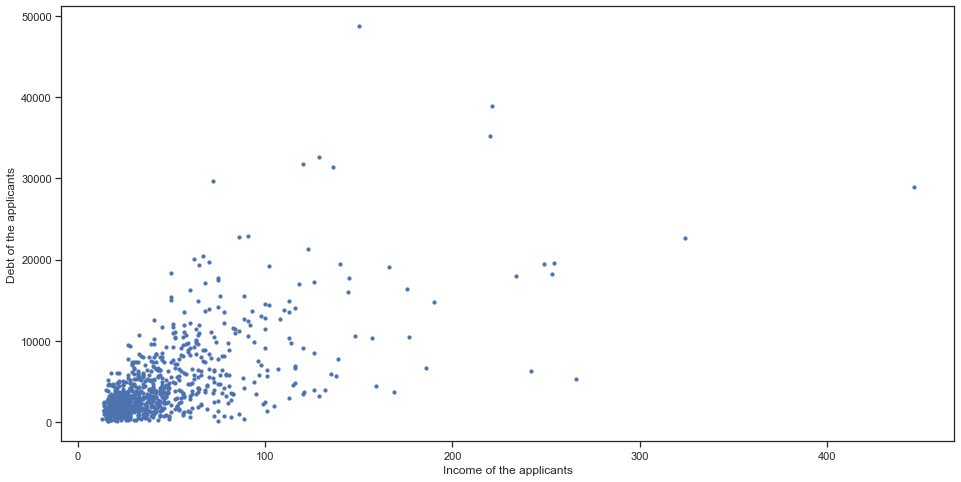

In [33]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_loan['income'], y=train_loan['debt'], s=10)
plt.xlabel('Income of the applicants')
plt.ylabel('Debt of the applicants')
plt.show()

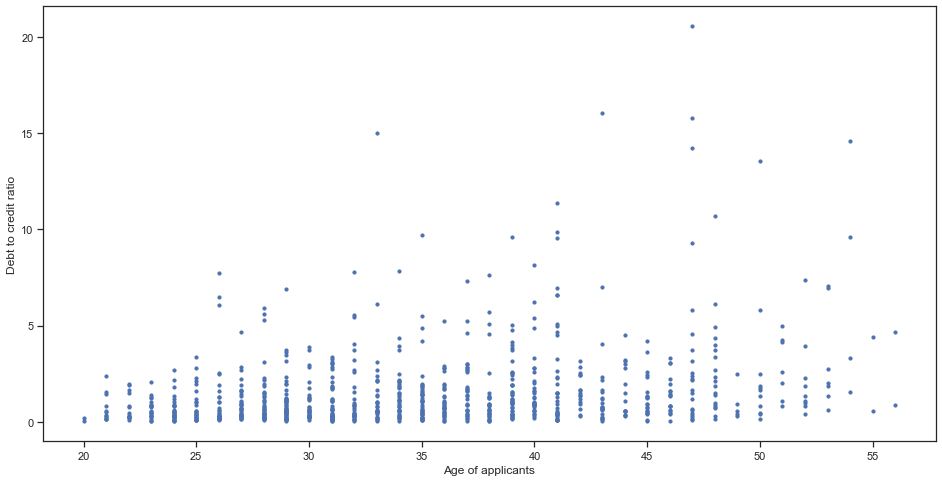

In [34]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_loan['age'], y=train_loan['creddebt'], s=10)
plt.xlabel('Age of applicants')
plt.ylabel('Debt to credit ratio')
plt.show()

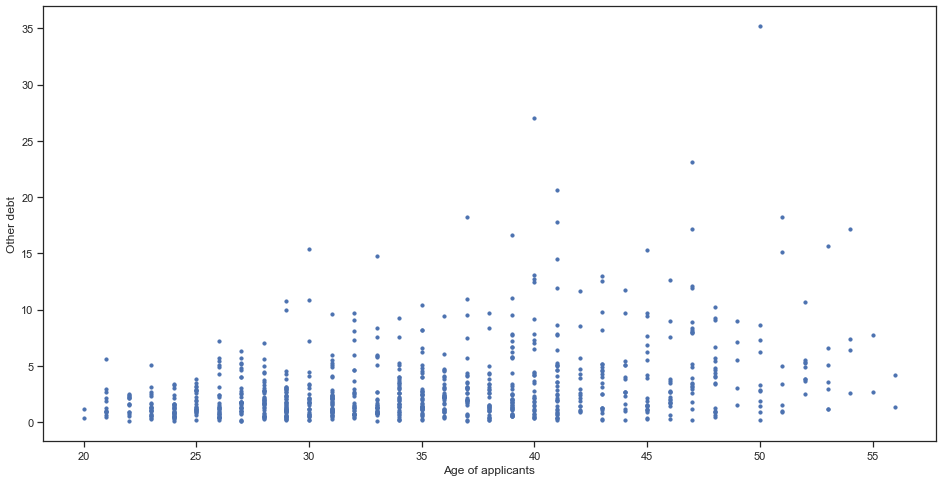

In [35]:
plt.figure(figsize=(16,8))
plt.scatter(x=train_loan['age'], y=train_loan['othdebt'], s=10)
plt.xlabel('Age of applicants')
plt.ylabel('Other debt')
plt.show()

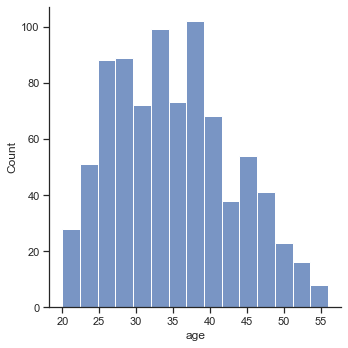

In [36]:
sns.displot(train_loan, x="age")

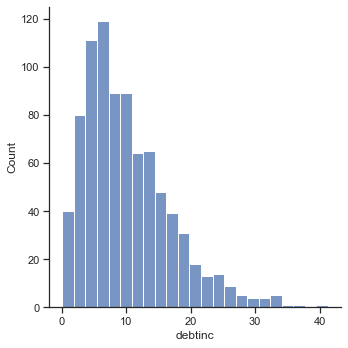

In [37]:
sns.displot(train_loan, x="debtinc")

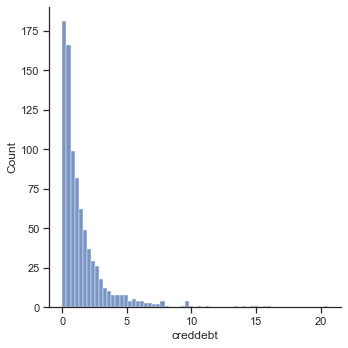

In [38]:
sns.displot(train_loan, x="creddebt")

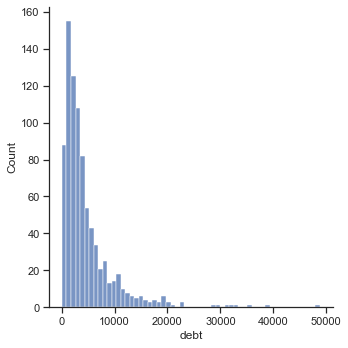

In [39]:
sns.displot(train_loan, x="debt")

age


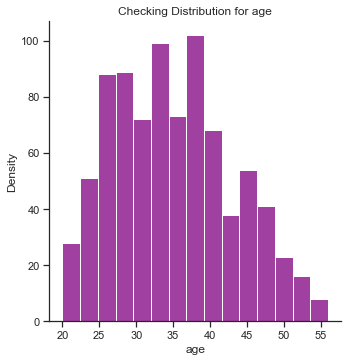

employ


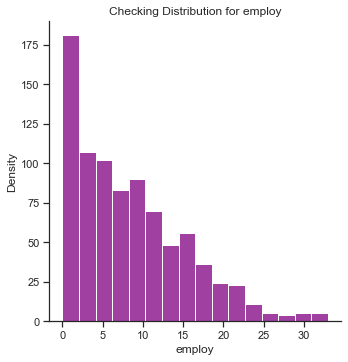

address


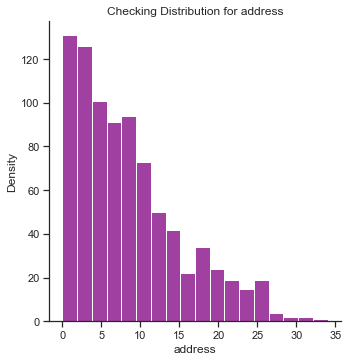

income


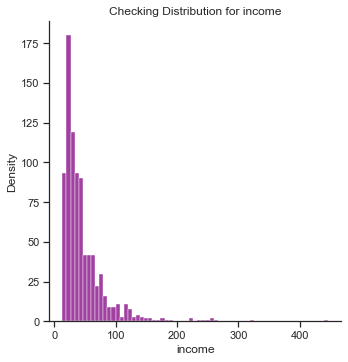

debtinc


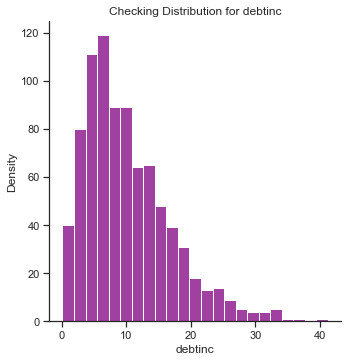

creddebt


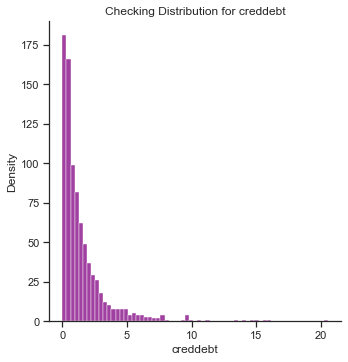

othdebt


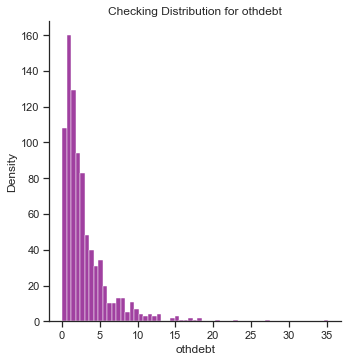

In [40]:
for i in ['age', 'employ', 'address','income', 'debtinc', 'creddebt', 'othdebt']:
    print(i)
    sns.displot(train_loan[i],bins='auto',color='purple')
    plt.title("Checking Distribution for "+i)
    plt.ylabel("Density")
    plt.show()

<h4>Data Balancing</h4>

We're dealing with a classification problem, we have to predict whether or not an applicant will default on a borrowed loan. We are using the historical data of 700 applicants to train our model and predict on the basis of these entries. However the model will be biased if we feed imbalanced data and train on it, i.e. It is important to check the balance of classes 0 and 1 in those 700 observations which will serve as train data to our model. If the frequency of either class is extremely high or low, more such observations will be fed to our model, causing it to predict entries on the test data as biased. Therefore, to receive fair predictions on unseen test data, we must feed a balance of both classes (0 and 1).

First we'll check the count of both classes and calculate it in terms of percentage against the 700 observations.

If the balance seems skewed, then we must use any of the class balancing techniques.

In [41]:
train_loan['default'].value_counts()

print('Fradulent cases -->', (183/700)*100)
print('Non-Fradulent cases -->', (517/700)*100)

Fradulent cases --> 26.142857142857146
Non-Fradulent cases --> 73.85714285714286


This indicates that the count of 0's is much more than the count of 1's. Therefore we'll call the 1's (defualt) class as the minority class and 0 (no default) class as the majority class. The following techniques can be used to balance the two classes:<br><br>

<li>Minority Oversampling</li>
<li>Majority Undersampling</li>
<li>Synthetic Minority oversampling technique - SMOTE</li>

<h4>Minority oversampling</h4>- as the name suggests oversamples the minortiy class by creating random duplicate observations from the minority class to match the percentage of the majority class. This random oversampling can cause redundant observations to affect the model performance.

<h4>Majority undersampling</h4>- as the name suggests undersamples the majority class by removing random observations from the majority class to match the percentage of the minority class. This random undersampling and removing the observations can cause important loss of information.

<h4>SMOTE</h4>- is a synthetic minority class oversampling technique, which uses ML algorithm of K-nearest neighbor to oversample the minortiy class by predicting neighbors and synthetically creating observations which are more justified compared to random oversampling.

The importance in all of these sampling techniques is most for minority classes as the idea behind building a robust model is to predict the minority class correctly when the training data is limited but still predicts well on the unseen test data.

<h3>Data Pre-processing</h3>

In [42]:
train_loan['age'] = np.log1p(train_loan['age']) # Apply log transformation to age
train_loan['employ'] = np.log1p(train_loan['employ']) # Apply log transformation to employment in years
train_loan['address'] = np.log1p(train_loan['address']) # Apply log transformation to address
train_loan['income'] = np.log1p(train_loan['income']) # Apply log transformation to income
train_loan['debtinc'] = np.log1p(train_loan['debtinc']) # Apply log transformation to debt to income ratio
train_loan['creddebt'] = np.log1p(train_loan['creddebt']) # Apply log transformation to debt to credit ratio
train_loan['othdebt'] = np.log1p(train_loan['othdebt']) # Apply log transformation to other debt
train_loan['debt'] = np.log1p(train_loan['debt']) # Apply log transformation to actual debt

In [43]:
from sklearn.model_selection import train_test_split

test_loan = train_loan[train_loan['default'].isnull()] # Separating the missing default varaible as our test dataframe

In [44]:
test_loan.head() # Checking the contents of the test dataframe

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,debt
700,3.610918,1,2.833213,2.639057,3.496508,2.476538,0.434459,1.372163,NaN,8.157370
701,3.931826,1,1.945910,3.332205,3.091042,2.631889,0.840089,0.872308,NaN,7.904704
702,3.713572,1,2.302585,2.302585,3.526361,2.890372,1.771676,0.547717,NaN,8.632484
703,3.465736,1,1.791759,2.079442,3.178054,1.098612,0.044973,0.346423,NaN,6.133398
704,3.401197,1,1.609438,0.000000,3.218876,2.174752,0.624191,0.695776,NaN,7.535297


In [45]:
train_loan.head() # Re-checking the head of the train dataframe

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,debt
0,3.737670,3,2.890372,2.564949,5.176150,2.332144,2.514416,1.793193,1,9.703145
1,3.332205,1,2.397895,1.945910,3.465736,2.906901,0.859594,1.609597,0,8.587465
2,3.713572,1,2.772589,2.708050,4.025352,1.871802,0.618464,1.153392,0,8.014997
3,3.737670,1,2.772589,2.708050,4.795791,1.360977,1.297113,0.599540,0,8.155075
4,3.218876,2,1.098612,0.000000,3.367296,2.906901,1.025122,1.400336,1,8.485703


In [46]:
train_loan.dropna(inplace = True) # Removing the na values from our train dataframe

In [47]:
train_loan.shape # Checking the shape of the recently modified train dataframe

(700, 10)

In [48]:
test_loan.shape # Checking the shape of the recently created test dataframe

(150, 10)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

corr = train_loan.corr(method = 'pearson')
corr

,age,employ,address,income,debtinc,creddebt,othdebt,debt
age,1.000000,0.502853,0.528006,0.579952,0.014535,0.329236,0.361917,0.368401
employ,0.502853,1.000000,0.268563,0.644993,-0.066840,0.329848,0.340103,0.346018
address,0.528006,0.268563,1.000000,0.350988,0.042764,0.236001,0.246708,0.249647
income,0.579952,0.644993,0.350988,1.000000,-0.021242,0.564693,0.599173,0.599029
debtinc,0.014535,-0.066840,0.042764,-0.021242,1.000000,0.592199,0.710195,0.784526
creddebt,0.329236,0.329848,0.236001,0.564693,0.592199,1.000000,0.662484,0.811905
othdebt,0.361917,0.340103,0.246708,0.599173,0.710195,0.662484,1.000000,0.931370
debt,0.368401,0.346018,0.249647,0.599029,0.784526,0.811905,0.931370,1.000000


We observe that our dataset exhibits the following correlations between independent variables:<br><br>

<b>age vs employment</b>- The correlation stands at 0.50, a positive and neutral correlation, stating that the relationship between age and employment is linear and directly proportional.<br>
<b>age vs address</b>- The correlation stands at 0.52, a positive and neutral correlation, stating that the relationship between age and address shows no derivable traits.<br>
<b>age vs income</b>- The correlation stands at 0.57, a positive and neutral correlation, stating that the relationship between age and income is linear and directly proportional.<br>
<b>age vs debt to income ratio</b>- The correlation stands at 0.014, a positive but extremely weak correlation, stating age has no impact on the debt to income ratio of the applicants.<br>
<b>age vs debt to credit ratio</b>- The correlation stands at 0.32, a positive but weak correlation, stating although higher than debt to income ratio, the impact is still minimum.<br>
<b>age vs other debt</b>- The correlation stands at 0.36, a positive but weak correlation, stating age and other debt has minimal impact on our model.<br>
<b>employment vs income</b>- The correlation stands at 0.64, a positive and high correlation, stating that the relationship between employment and income is linear and directly proportional.<br>
The internal relationship between debts and income is high and is as expected. However our derived variable actual debt shows no impact and only adds an effect of multicollinearity.

In [50]:
to_drop_train = ['debt']
train_loan = train_loan.drop(to_drop_train, axis = 1)

In [51]:
to_drop_test = ['debt']
test_loan = test_loan.drop(to_drop_test, axis = 1)

In [64]:
train_loan['default'] = train_loan['default'].astype(int)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(train_loan.iloc[:, train_loan.columns != 'default'], 
                         train_loan.iloc[:, 8], test_size = 0.25, random_state = 1)

In [60]:
X_train.shape

(525, 8)

In [61]:
X_test.shape

(175, 8)

In [62]:
#!pip install imblearn
#!pip install delayed
from imblearn.over_sampling import SMOTE

In [63]:
from collections import Counter
cnt = Counter(y_train)
print('Before applying SMOTE - ', cnt)

Before applying SMOTE -  Counter({0: 393, 1: 132})


In [65]:
sm = SMOTE()
X_train.sm, y_train.sm = sm.fit_resample(X_train, y_train)
cnt1 = Counter(y_train.sm)
print('After applying SMOTE - ', cnt1)

After applying SMOTE -  Counter({0: 393, 1: 393})


<ipython-input-65-9ded9928ff6d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.sm, y_train.sm = sm.fit_resample(X_train, y_train)


<h3>Model Building</h3>

This being a classification problem, we'll build the following algorithms.<br><br>

<li>Logistic Regression</li>
<li>K-Nearest Neighbor</li>
<li>Naive Bayes</li>
<li>CART - Classification Trees</li>
<li>Random Forest</li>

In [66]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

<h4>Logistic Regression</h4>

In [67]:
logreg = LogisticRegression() # Initiate an instance of LogisticRegression class and assign it to an object
logreg.fit(X_train.sm, y_train.sm) # Call the function fit to fit our model using the object we created

LogisticRegression()

In [68]:
pred_LR = logreg.predict(X_test) # Predicting the model on test data and storing it in an object

In [69]:
CM_LR = metrics.confusion_matrix(y_test, pred_LR) # Calculating the confusion matrix on test data
CM_LR

array([[95, 29],
       [10, 41]])

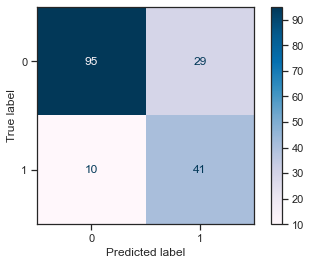

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import cm
CM_LR = metrics.confusion_matrix(y_test, pred_LR, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = CM_LR, display_labels=logreg.classes_)
disp.plot(cmap='PuBu')

In [71]:
print("Accuracy of LR model is -",metrics.accuracy_score(y_test, pred_LR))
print("Precision of LR model is -",metrics.precision_score(y_test, pred_LR))
print("Recall of LR model is -",metrics.recall_score(y_test, pred_LR))
print("F1 score of LR model is -",metrics.f1_score(y_test, pred_LR))

Accuracy of LR model is - 0.7771428571428571
Precision of LR model is - 0.5857142857142857
Recall of LR model is - 0.803921568627451
F1 score of LR model is - 0.6776859504132232


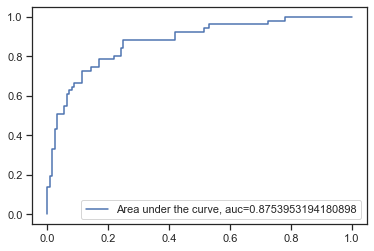

In [72]:
Pred_LR_prob = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Pred_LR_prob)
auc = metrics.roc_auc_score(y_test, Pred_LR_prob)
plt.plot(fpr,tpr,label="Area under the curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h4>K-Nearest Neighbor</h4>

In [73]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train.sm, y_train.sm)

KNeighborsClassifier(n_neighbors=3)

In [74]:
pred_KNN = knn.predict(X_test)

In [75]:
CM_KNN = metrics.confusion_matrix(y_test, pred_KNN)
CM_KNN

array([[93, 31],
       [21, 30]])

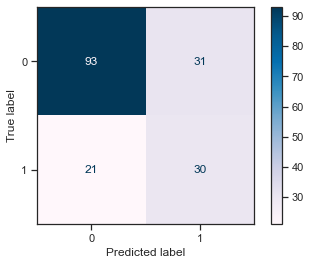

In [76]:
CM_KNN = metrics.confusion_matrix(y_test, pred_KNN, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = CM_KNN, display_labels=knn.classes_)
disp.plot(cmap='PuBu')

In [77]:
print("Accuracy of KNN model is -",metrics.accuracy_score(y_test, pred_KNN))
print("Precision of KNN model is -",metrics.precision_score(y_test, pred_KNN))
print("Recall of KNN model is -",metrics.recall_score(y_test, pred_KNN))
print("F1 score of KNN model is -",metrics.f1_score(y_test, pred_KNN))

Accuracy of KNN model is - 0.7028571428571428
Precision of KNN model is - 0.4918032786885246
Recall of KNN model is - 0.5882352941176471
F1 score of KNN model is - 0.5357142857142858


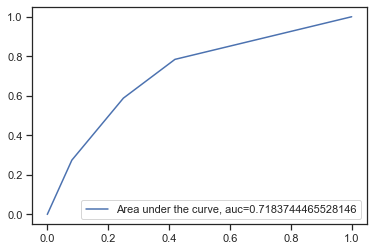

In [78]:
Pred_KNN_prob = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Pred_KNN_prob)
auc = metrics.roc_auc_score(y_test, Pred_KNN_prob)
plt.plot(fpr,tpr,label="Area under the curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h4>K-Nearest Neighbour - Hypertuned model (parameters - n_neighbors)</h4>

In [79]:
knn1 = KNeighborsClassifier(n_neighbors=6)
knn1.fit(X_train.sm, y_train.sm)

KNeighborsClassifier(n_neighbors=6)

In [80]:
pred_KNN1 = knn1.predict(X_test)

In [81]:
CM_KNN1 = metrics.confusion_matrix(y_test, pred_KNN1)
CM_KNN1

array([[103,  21],
       [ 20,  31]])

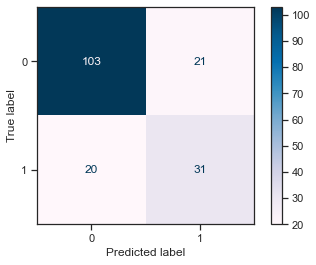

In [82]:
CM_KNN1 = metrics.confusion_matrix(y_test, pred_KNN1, labels=knn1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = CM_KNN1, display_labels=knn1.classes_)
disp.plot(cmap='PuBu')

In [83]:
print("Accuracy of hypertuned KNN model is -",metrics.accuracy_score(y_test, pred_KNN1))
print("Precision of hypertuned KNN model is -",metrics.precision_score(y_test, pred_KNN1))
print("Recall of hypertuned KNN model is -",metrics.recall_score(y_test, pred_KNN1))
print("F1 score of hypertuned KNN model is -",metrics.f1_score(y_test, pred_KNN1))

Accuracy of hypertuned KNN model is - 0.7657142857142857
Precision of hypertuned KNN model is - 0.5961538461538461
Recall of hypertuned KNN model is - 0.6078431372549019
F1 score of hypertuned KNN model is - 0.6019417475728156


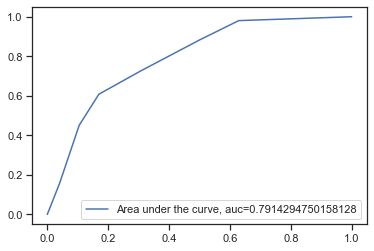

In [84]:
Pred_KNN_prob1 = knn1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Pred_KNN_prob1)
auc = metrics.roc_auc_score(y_test, Pred_KNN_prob1)
plt.plot(fpr,tpr,label="Area under the curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h4>Naive Bayes</h4>

In [85]:
nb = GaussianNB()
nb.fit(X_train.sm, y_train.sm)

GaussianNB()

In [86]:
pred_NB = nb.predict(X_test)

In [87]:
CM_NB = metrics.confusion_matrix(y_test, pred_NB)
CM_NB

array([[95, 29],
       [10, 41]])

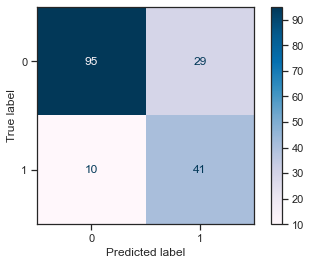

In [88]:
CM_NB = metrics.confusion_matrix(y_test, pred_NB, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = CM_NB, display_labels=nb.classes_)
disp.plot(cmap='PuBu')

In [89]:
print("Accuracy of NB model is -",metrics.accuracy_score(y_test, pred_NB))
print("Precision of NB model is -",metrics.precision_score(y_test, pred_NB))
print("Recall of NB model is -",metrics.recall_score(y_test, pred_NB))
print("F1 score of NB model is -",metrics.f1_score(y_test, pred_NB))

Accuracy of NB model is - 0.7771428571428571
Precision of NB model is - 0.5857142857142857
Recall of NB model is - 0.803921568627451
F1 score of NB model is - 0.6776859504132232


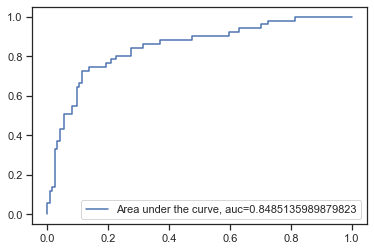

In [90]:
Pred_NB_prob = nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Pred_NB_prob)
auc = metrics.roc_auc_score(y_test, Pred_NB_prob)
plt.plot(fpr,tpr,label="Area under the curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h4>CART - Classification Tree</h4>

In [91]:
ct = DecisionTreeClassifier()
ct.fit(X_train.sm, y_train.sm)

DecisionTreeClassifier()

In [92]:
pred_CT = ct.predict(X_test)

In [93]:
CM_CT = metrics.confusion_matrix(y_test, pred_CT)
CM_CT

array([[106,  18],
       [ 24,  27]])

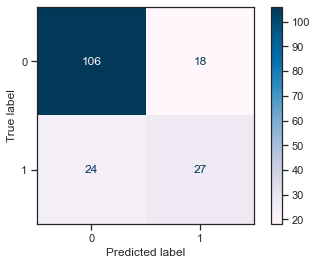

In [94]:
CM_CT = metrics.confusion_matrix(y_test, pred_CT, labels=ct.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = CM_CT, display_labels=ct.classes_)
disp.plot(cmap='PuBu')

In [95]:
print("Accuracy of CT model is -",metrics.accuracy_score(y_test, pred_CT))
print("Precision of CT model is -",metrics.precision_score(y_test, pred_CT))
print("Recall of CT model is -",metrics.recall_score(y_test, pred_CT))
print("F1 score of CT model is -",metrics.f1_score(y_test, pred_CT))

Accuracy of CT model is - 0.76
Precision of CT model is - 0.6
Recall of CT model is - 0.5294117647058824
F1 score of CT model is - 0.5625


In [96]:
from sklearn import tree
import graphviz

CT_viz = tree.export_graphviz(ct, out_file=None, feature_names=X_train.sm.columns)
graph = graphviz.Source(CT_viz)

In [97]:
graph.render("CT_node_split")

'CT_node_split.pdf'

<h4>Hyperparameters tuning - Decision Tree (Entropy)</h4>

In [98]:
ct1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
ct1.fit(X_train.sm, y_train.sm)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [99]:
pred_CT1 = ct1.predict(X_test)

In [100]:
CM_CT1 = metrics.confusion_matrix(y_test, pred_CT1)
CM_CT1

array([[101,  23],
       [ 17,  34]])

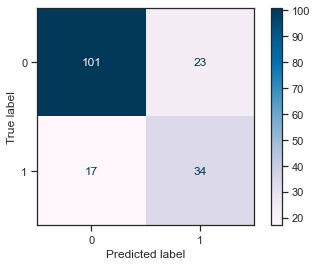

In [101]:
CM_CT1 = metrics.confusion_matrix(y_test, pred_CT1, labels=ct1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = CM_CT1, display_labels=ct1.classes_)
disp.plot(cmap='PuBu')

In [102]:
print("Accuracy of hypertuned CT model is -",metrics.accuracy_score(y_test, pred_CT1))
print("Precision of hypertuned CT model is -",metrics.precision_score(y_test, pred_CT1))
print("Recall of hypertuned CT model is -",metrics.recall_score(y_test, pred_CT1))
print("F1 score of hypertuned CT model is -",metrics.f1_score(y_test, pred_CT1))

Accuracy of hypertuned CT model is - 0.7714285714285715
Precision of hypertuned CT model is - 0.5964912280701754
Recall of hypertuned CT model is - 0.6666666666666666
F1 score of hypertuned CT model is - 0.6296296296296297


In [103]:
importance = ct1.feature_importances_

In [104]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.12725
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.39407
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.44139
Feature: 6, Score: 0.03729
Feature: 7, Score: 0.00000


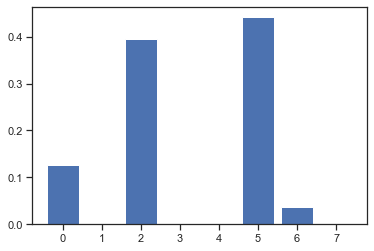

In [105]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

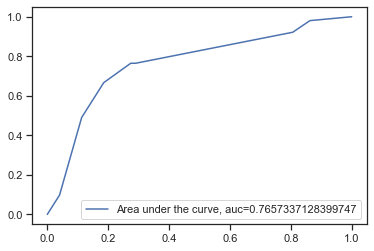

In [106]:
Pred_CT1_prob = ct1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Pred_CT1_prob)
auc = metrics.roc_auc_score(y_test, Pred_CT1_prob)
plt.plot(fpr,tpr,label="Area under the curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h4>Hyperparameters tuning - Decision Tree (Entropy)</h4>

In [107]:
ct2 = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_leaf=10, min_samples_split=10)
ct2.fit(X_train.sm, y_train.sm)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10,
                       min_samples_split=10)

In [108]:
pred_CT2 = ct2.predict(X_test)

In [109]:
CM_CT2 = metrics.confusion_matrix(y_test, pred_CT2)
CM_CT2

array([[98, 26],
       [18, 33]])

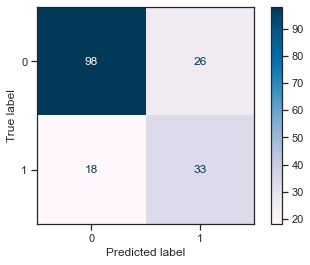

In [110]:
CM_CT2 = metrics.confusion_matrix(y_test, pred_CT2, labels=ct2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = CM_CT2, display_labels=ct2.classes_)
disp.plot(cmap='PuBu')

In [111]:
print("Accuracy of hypertuned CT model is -",metrics.accuracy_score(y_test, pred_CT2))
print("Precision of hypertuned CT model is -",metrics.precision_score(y_test, pred_CT2))
print("Recall of hypertuned CT model is -",metrics.recall_score(y_test, pred_CT2))
print("F1 score of hypertuned CT model is -",metrics.f1_score(y_test, pred_CT2))

Accuracy of hypertuned CT model is - 0.7485714285714286
Precision of hypertuned CT model is - 0.559322033898305
Recall of hypertuned CT model is - 0.6470588235294118
F1 score of hypertuned CT model is - 0.6


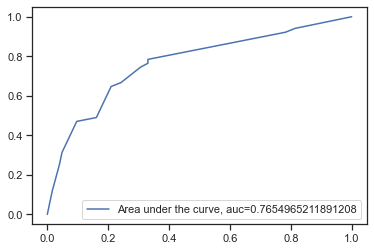

In [112]:
Pred_CT2_prob = ct2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Pred_CT2_prob)
auc = metrics.roc_auc_score(y_test, Pred_CT2_prob)
plt.plot(fpr,tpr,label="Area under the curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h4>Hyperparameters tuning - Decision Tree (Gini)</h4>

In [113]:
ct3 = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=2, min_samples_split=3)
ct3.fit(X_train.sm, y_train.sm)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=3)

In [114]:
pred_CT3 = ct3.predict(X_test)

In [115]:
CM_CT3 = metrics.confusion_matrix(y_test, pred_CT3)
CM_CT3

array([[108,  16],
       [ 19,  32]])

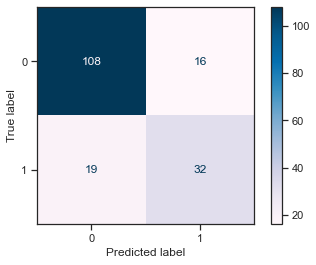

In [116]:
CM_CT3 = metrics.confusion_matrix(y_test, pred_CT3, labels=ct3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = CM_CT3, display_labels=ct3.classes_)
disp.plot(cmap='PuBu')

In [117]:
print("Accuracy of hypertuned CT model is -",metrics.accuracy_score(y_test, pred_CT3))
print("Precision of hypertuned CT model is -",metrics.precision_score(y_test, pred_CT3))
print("Recall of hypertuned CT model is -",metrics.recall_score(y_test, pred_CT3))
print("F1 score of hypertuned CT model is -",metrics.f1_score(y_test, pred_CT3))

Accuracy of hypertuned CT model is - 0.8
Precision of hypertuned CT model is - 0.6666666666666666
Recall of hypertuned CT model is - 0.6274509803921569
F1 score of hypertuned CT model is - 0.6464646464646465


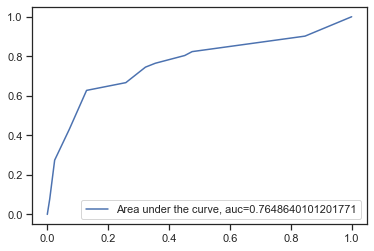

In [118]:
Pred_CT3_prob = ct3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Pred_CT3_prob)
auc = metrics.roc_auc_score(y_test, Pred_CT3_prob)
plt.plot(fpr,tpr,label="Area under the curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [119]:
#!pip install six
#!pip install pydotplus

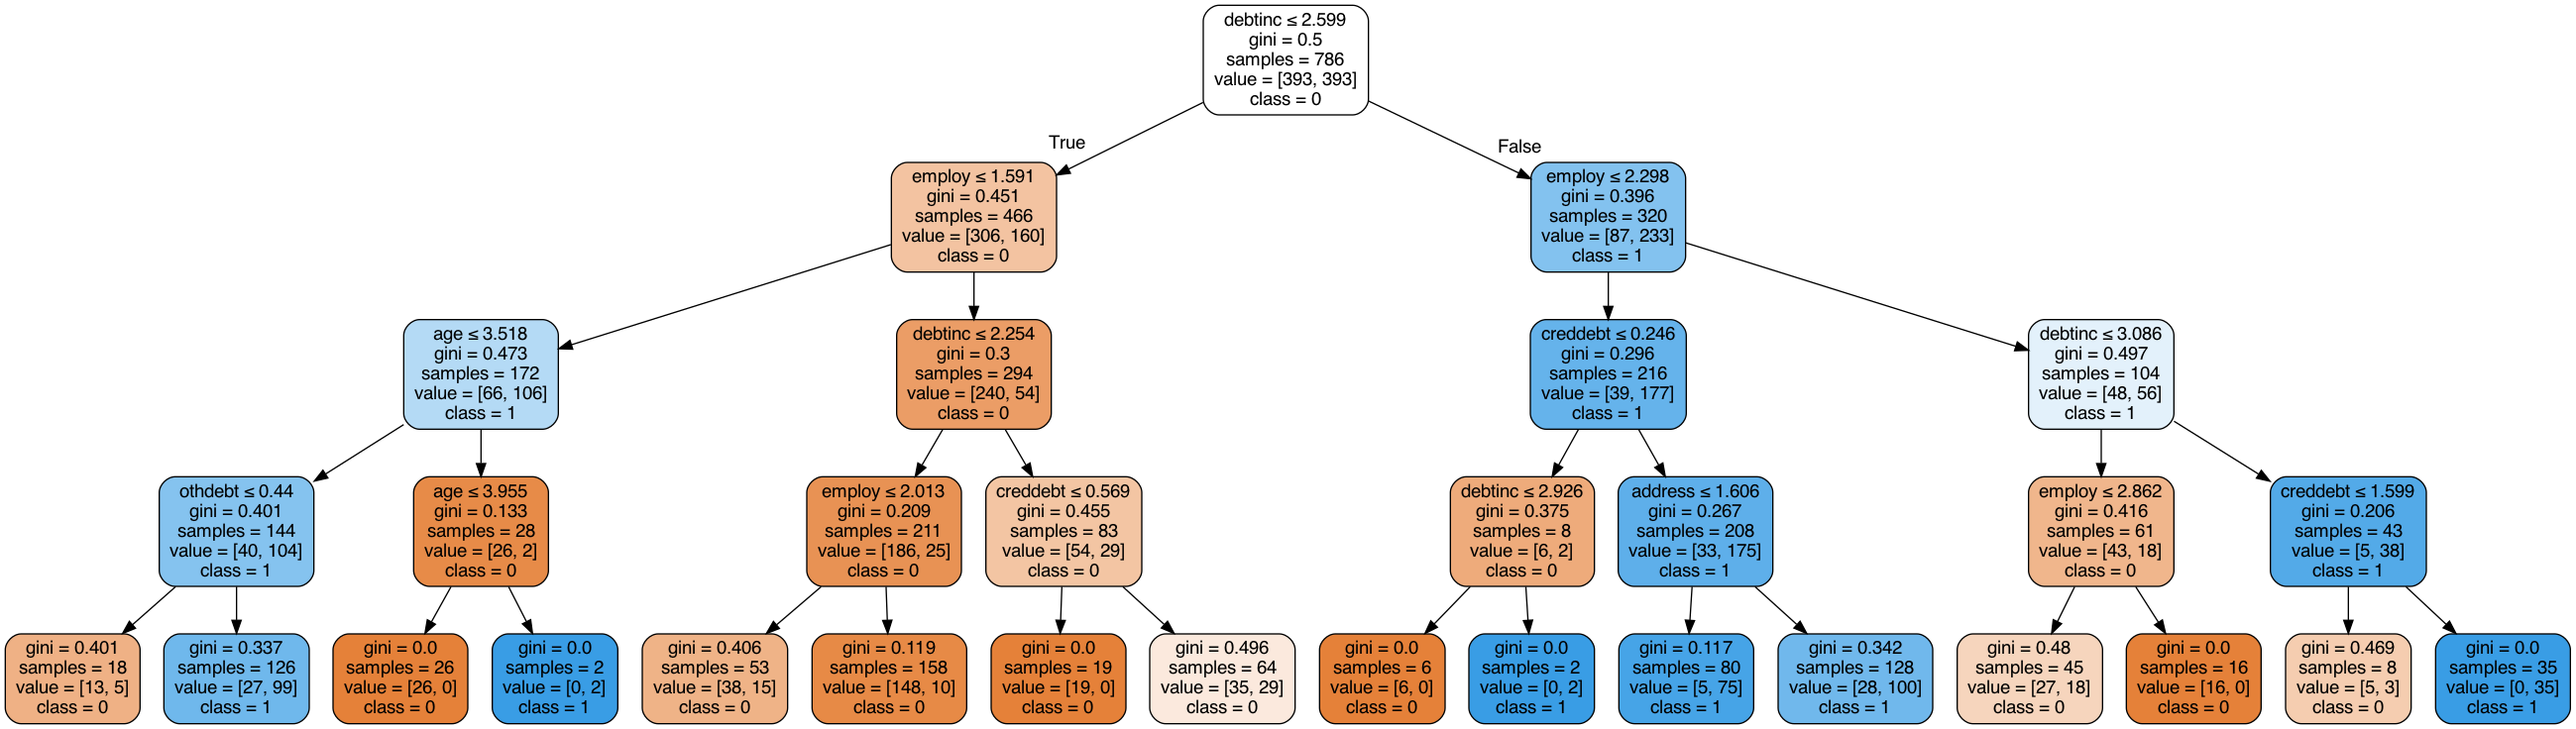

In [120]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(ct3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.sm.columns, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit_default.png')
Image(graph.create_png())

<h4>Random Forest</h4>

In [121]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train.sm, y_train.sm)

RandomForestClassifier()

In [122]:
pred_RF = rf.predict(X_test)

In [123]:
CM_RF = metrics.confusion_matrix(y_test, pred_RF)
CM_RF

array([[105,  19],
       [ 17,  34]])

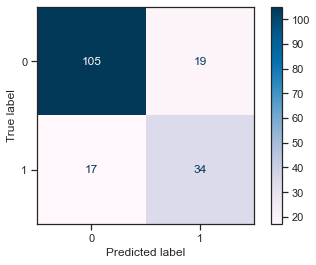

In [124]:
CM_RF = metrics.confusion_matrix(y_test, pred_RF, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = CM_RF, display_labels=rf.classes_)
disp.plot(cmap='PuBu')

In [125]:
print("Accuracy of RF model is -",metrics.accuracy_score(y_test, pred_RF))
print("Precision of RF model is -",metrics.precision_score(y_test, pred_RF))
print("Recall of RF model is -",metrics.recall_score(y_test, pred_RF))
print("F1 score of RF model is -",metrics.f1_score(y_test, pred_RF))

Accuracy of RF model is - 0.7942857142857143
Precision of RF model is - 0.6415094339622641
Recall of RF model is - 0.6666666666666666
F1 score of RF model is - 0.6538461538461539


In [126]:
importance_RF = rf.feature_importances_

In [127]:
for i,v in enumerate(importance_RF):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10822
Feature: 1, Score: 0.04731
Feature: 2, Score: 0.18419
Feature: 3, Score: 0.10730
Feature: 4, Score: 0.10163
Feature: 5, Score: 0.17820
Feature: 6, Score: 0.15953
Feature: 7, Score: 0.11361


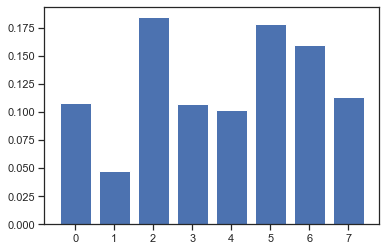

In [128]:
plt.bar([x for x in range(len(importance_RF))], importance_RF)
plt.show()

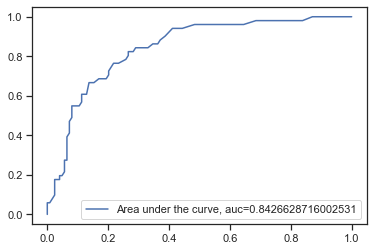

In [129]:
Pred_RF_prob = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Pred_RF_prob)
auc = metrics.roc_auc_score(y_test, Pred_RF_prob)
plt.plot(fpr,tpr,label="Area under the curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h4>Hyperparameter tuning - Random Forest</h4>

In [130]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth = 6, max_features = 3)
rf1.fit(X_train.sm, y_train.sm)

RandomForestClassifier(max_depth=6, max_features=3)

In [131]:
pred_RF1 = rf1.predict(X_test)

In [132]:
CM_RF1 = metrics.confusion_matrix(y_test, pred_RF1)
CM_RF1

array([[100,  24],
       [ 15,  36]])

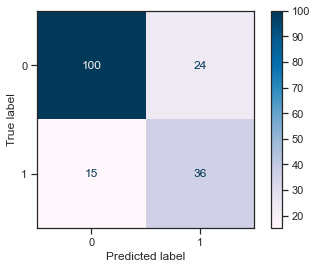

In [133]:
CM_RF1 = metrics.confusion_matrix(y_test, pred_RF1, labels=rf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = CM_RF1, display_labels=rf1.classes_)
disp.plot(cmap='PuBu')

In [134]:
print("Accuracy of hyperparameter tuned RF model is -",metrics.accuracy_score(y_test, pred_RF1))
print("Precision of hyperparameter tuned RF model is -",metrics.precision_score(y_test, pred_RF1))
print("Recall of RF hyperparameter tuned model is -",metrics.recall_score(y_test, pred_RF1))
print("F1 score of hyperparameter tuned RF model is -",metrics.f1_score(y_test, pred_RF1))

Accuracy of hyperparameter tuned RF model is - 0.7771428571428571
Precision of hyperparameter tuned RF model is - 0.6
Recall of RF hyperparameter tuned model is - 0.7058823529411765
F1 score of hyperparameter tuned RF model is - 0.6486486486486486


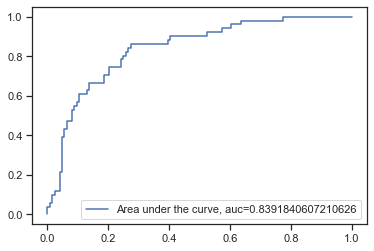

In [135]:
Pred_RF1_prob = rf1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  Pred_RF1_prob)
auc = metrics.roc_auc_score(y_test, Pred_RF1_prob)
plt.plot(fpr,tpr,label="Area under the curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h4>Model comparison</h4>

In [136]:
# Storing the accuracies of the models
LR_acc = metrics.accuracy_score(y_test, pred_LR)
KNN_acc = metrics.accuracy_score(y_test, pred_KNN1)
NB_acc = metrics.accuracy_score(y_test, pred_NB)
CT_acc = metrics.accuracy_score(y_test, pred_CT3)
RF_acc = metrics.accuracy_score(y_test, pred_RF1)

# Storing the classification error of the models
LR_err = 1-LR_acc
KNN_err = 1-KNN_acc
NB_err = 1-NB_acc
CT_err = 1-CT_acc
RF_err = 1-RF_acc

# Storing the precision of the models
LR_pre = metrics.precision_score(y_test, pred_LR)
KNN_pre = metrics.precision_score(y_test, pred_KNN1)
NB_pre = metrics.precision_score(y_test, pred_NB)
CT_pre = metrics.precision_score(y_test, pred_CT3)
RF_pre = metrics.precision_score(y_test, pred_RF1)

# Storing the recall of the models
LR_rec = metrics.recall_score(y_test, pred_LR)
KNN_rec = metrics.recall_score(y_test, pred_KNN1)
NB_rec = metrics.recall_score(y_test, pred_NB)
CT_rec = metrics.recall_score(y_test, pred_CT3)
RF_rec = metrics.recall_score(y_test, pred_RF1)

# Storing the f1 scores of the models
LR_f1 = metrics.f1_score(y_test, pred_LR)
KNN_f1 = metrics.f1_score(y_test, pred_KNN1)
NB_f1 = metrics.f1_score(y_test, pred_NB)
CT_f1 = metrics.f1_score(y_test, pred_CT3)
RF_f1 = metrics.f1_score(y_test, pred_RF1)

In [137]:
Accuracy = [LR_acc, KNN_acc, NB_acc, CT_acc, RF_acc]
Error = [LR_err, KNN_err, NB_err, CT_err, RF_err]
Precision = [LR_pre, KNN_pre, NB_pre, CT_pre, RF_pre]
Recall = [LR_rec, KNN_rec, NB_rec, CT_rec, RF_rec]
F1_Score = [LR_f1, KNN_f1, NB_f1, CT_f1, RF_f1]

col = {'Accuracy':Accuracy, 'Error':Error, 'Precision':Precision, 'Recall':Recall, 'F1 Score':F1_Score}
models = ['Logistic Regression','K-Nearest Neighbor', 'Naive Bayes', 'Classification Tree', 'Random Forest']
summary = pd.DataFrame(data=col,index=models).round(3)

In [138]:
summary

,Accuracy,Error,Precision,Recall,F1 Score
Logistic Regression,0.777,0.223,0.586,0.804,0.678
K-Nearest Neighbor,0.766,0.234,0.596,0.608,0.602
Naive Bayes,0.777,0.223,0.586,0.804,0.678
Classification Tree,0.800,0.200,0.667,0.627,0.646
Random Forest,0.777,0.223,0.600,0.706,0.649


In [139]:
final_model = GaussianNB()
final_model.fit(X_train.sm, y_train.sm)

GaussianNB()

In [141]:
to_drop_test1 = ['default']
test_loan = test_loan.drop(to_drop_test1, axis = 1)

In [142]:
pred_final = final_model.predict(test_loan)

In [143]:
test_loan['default'] = pred_final

In [144]:
test_loan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,3.610918,1,2.833213,2.639057,3.496508,2.476538,0.434459,1.372163,0
701,3.931826,1,1.945910,3.332205,3.091042,2.631889,0.840089,0.872308,0
702,3.713572,1,2.302585,2.302585,3.526361,2.890372,1.771676,0.547717,1
703,3.465736,1,1.791759,2.079442,3.178054,1.098612,0.044973,0.346423,0
704,3.401197,1,1.609438,0.000000,3.218876,2.174752,0.624191,0.695776,0


In [145]:
test_loan.to_csv('test_loan_predicted.csv')